In [5]:
%matplotlib inline
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 8
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

def get_train_X_Y():
    import scipy.io as spio
    import numpy as np

    mat = spio.loadmat('ISI_BN_Trn18000Tst4000(XBN).mat', squeeze_me=True)

    org_train_x = mat['org_train_x']
    org_train_y = mat['org_train_y']


    train_X = np.empty((18000, 28, 28))
    size=(48,48)
    for i in range(0,18000):
    #     print(i)
        if i >= 3600 and i < 10800:
            img = np.rot90(org_train_x[i].reshape(28,28),k =3)
            img = np.fliplr(img)
    #     elif i >= 9000 and i < 10800:
    #         img = np.rot90(org_train_x[i].reshape(28,28),k =3)
    #         img = np.fliplr(img)
        elif i >= 12600 and i < 14400:
            img = np.rot90(org_train_x[i].reshape(28,28),k =3)
            img = np.fliplr(img)
        elif i>= 14400 and i < 16200:
            img = np.rot90(org_train_x[i].reshape(28,28),k =3)
            img = np.fliplr(img)
        else:
            img = org_train_x[i].reshape(28,28)
    #     height, width = img.shape[:2]
    #     dst = cv2.resize(img, (5*width, 5*height), interpolation = cv2.INTER_CUBIC)

    #     x = np.pad(img,pad_width=2, mode='constant', constant_values=[0])
    #     cv2.imwrite("output_saved_mat/digit_"+ str(i) +".png",x*255)

        train_X[i] = img


    zero = train_X[0:1800]
    one = train_X[5400:7200]
    two = train_X[3600:5400]
    three = train_X[1800:3600]
    four = train_X[7200:9000]
    five = train_X[9000:10800]
    six = train_X[16200:18000]
    seven = train_X[12600:14400]
    eight = train_X[14400:16200]
    nine = train_X[10800:12600]

    train_x = np.concatenate((zero, one, two, three, four, five, six, seven, eight, nine))

    y = []
    for j in range(10):
        for i in range(1800):
                y.append(j)

    train_y = to_categorical(y)

    return (train_x, train_y)
#         return (train_x, train_y)


(18000, 28, 28)


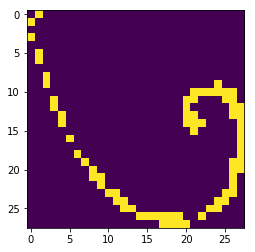

In [6]:
x_train, y_train = shuffle(get_train_X_Y()[0], get_train_X_Y()[1])

# print(y_train)
print(x_train.shape)

plt.imshow(x_train[0])

In [7]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
x_train /= 255
# x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (18000, 28, 28, 1)
18000 train samples


In [ ]:
model.fit(x_train, y_train,
          validation_split=.33,
          batch_size=batch_size,
#           callbacks=callbacks_list, verbose=1,
#           validation_data=(x_test, y_test),
          epochs=500)

Train on 12059 samples, validate on 5941 samples
Epoch 1/500
12059/12059 [==============================] - 2s 193us/step - loss: 2.3025 - acc: 0.0990 - val_loss: 2.3023 - val_acc: 0.0971
Epoch 2/500
12059/12059 [==============================] - 1s 116us/step - loss: 2.3011 - acc: 0.1160 - val_loss: 2.3004 - val_acc: 0.0956
Epoch 3/500
12059/12059 [==============================] - 1s 106us/step - loss: 2.1445 - acc: 0.3046 - val_loss: 1.3311 - val_acc: 0.6459
Epoch 4/500
12059/12059 [==============================] - 1s 108us/step - loss: 0.7646 - acc: 0.7564 - val_loss: 0.4909 - val_acc: 0.8431
Epoch 5/500
12059/12059 [==============================] - 1s 107us/step - loss: 0.5298 - acc: 0.8289 - val_loss: 0.4017 - val_acc: 0.8638
Epoch 6/500
12059/12059 [==============================] - 1s 108us/step - loss: 0.4573 - acc: 0.8511 - val_loss: 0.3845 - val_acc: 0.8761
Epoch 7/500
12059/12059 [==============================] - 1s 106us/step - loss: 0.4117 - acc: 0.8667 - val_loss: 0.3

12059/12059 [==============================] - 1s 109us/step - loss: 0.1724 - acc: 0.9444 - val_loss: 0.1470 - val_acc: 0.9544
Epoch 60/500
12059/12059 [==============================] - 1s 107us/step - loss: 0.1667 - acc: 0.9438 - val_loss: 0.1436 - val_acc: 0.9554
Epoch 61/500
12059/12059 [==============================] - 1s 104us/step - loss: 0.1746 - acc: 0.9400 - val_loss: 0.1417 - val_acc: 0.9562
Epoch 62/500
12059/12059 [==============================] - 1s 108us/step - loss: 0.1680 - acc: 0.9450 - val_loss: 0.1509 - val_acc: 0.9515
Epoch 63/500
12059/12059 [==============================] - 1s 108us/step - loss: 0.1651 - acc: 0.9444 - val_loss: 0.1441 - val_acc: 0.9539
Epoch 64/500
12059/12059 [==============================] - 1s 107us/step - loss: 0.1645 - acc: 0.9437 - val_loss: 0.1385 - val_acc: 0.9562
Epoch 65/500
12059/12059 [==============================] - 1s 109us/step - loss: 0.1566 - acc: 0.9450 - val_loss: 0.1460 - val_acc: 0.9544
Epoch 66/500
12059/12059 [=======

 6912/12059 [================>.............] - ETA: 0s - loss: 0.1040 - acc: 0.9647